In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%%time
info_content_df = pd.read_csv('../data/raw/Info_Content.csv')
info_userdata_df = pd.read_csv('../data/raw/Info_UserData.csv')
log_problem_df = pd.read_csv('../data/raw/Log_Problem.csv')

Wall time: 9.17 s


In [3]:
info_content_df.head()

,ucid,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
0,odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【基礎】怎樣解題：數量關係,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
1,dfeeBaa8zDhWS6nu7zeXKwLyi4zqEajI3tJM9/fSBPM=,【基礎】和差問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
2,C2AT0OBTUn+PRxEVd39enhW/DJtka1Tk90DUAR6yVdA=,【基礎】雞兔問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
3,jZvYpEa6VB/WrlKKmQHnfbv/xJ4OypBzq0epVcn500Q=,【基礎】年齡問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
4,M+UxJPgRIW57a0YS3eik8A9YDj+AwaMpTa5yWYn/kAw=,【基礎】追趕問題,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=


In [27]:
info_content_df.shape

(1330, 10)

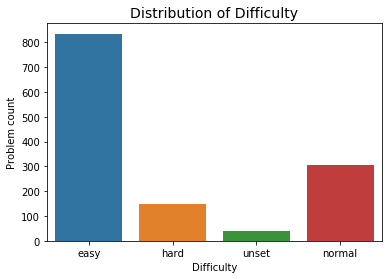

In [39]:
sns.countplot(info_content_df['difficulty'])
plt.title('Distribution of Difficulty',fontsize=14)
plt.xlabel('Difficulty', fontsize=10)
plt.ylabel('Problem count', fontsize=10)

plt.show()

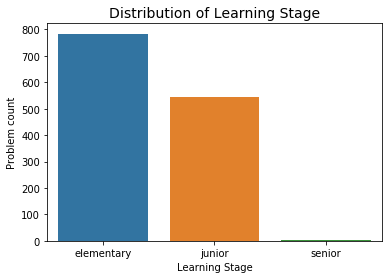

In [43]:
sns.countplot(info_content_df['learning_stage'])
plt.title('Distribution of Learning Stage',fontsize=14)
plt.xlabel('Learning Stage', fontsize=10)
plt.ylabel('Problem count', fontsize=10)

plt.show()

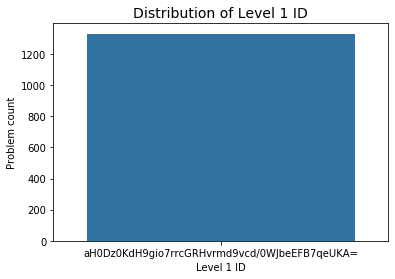

In [44]:
sns.countplot(info_content_df['level1_id'])
plt.title('Distribution of Level 1 ID',fontsize=14)
plt.xlabel('Level 1 ID', fontsize=10)
plt.ylabel('Problem count', fontsize=10)

plt.show()

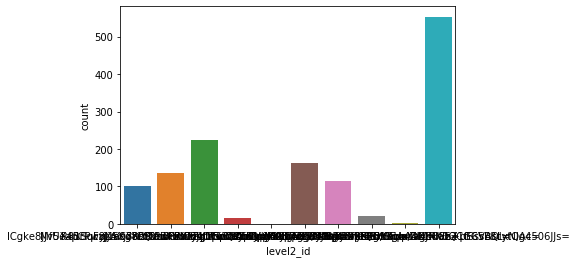

In [41]:
sns.countplot(info_content_df['level2_id'])

## Info_UserData

In [28]:
info_userdata_df.shape

(72758, 12)

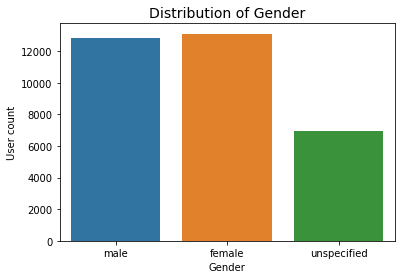

In [45]:
sns.countplot(info_userdata_df['gender'])
plt.title('Distribution of Gender',fontsize=14)
plt.xlabel('Gender', fontsize=10)
plt.ylabel('User count', fontsize=10)

plt.show()

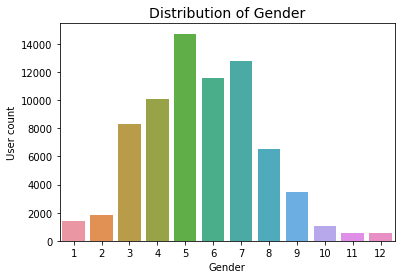

In [46]:
sns.countplot(info_userdata_df['user_grade'])
plt.title('Distribution of Gender',fontsize=14)
plt.xlabel('Gender', fontsize=10)
plt.ylabel('User count', fontsize=10)

plt.show()

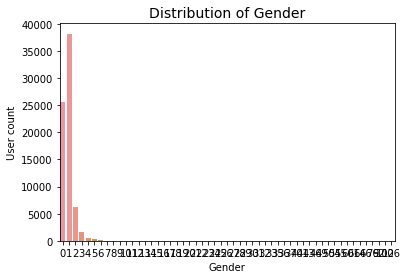

In [50]:
sns.countplot(info_userdata_df['has_teacher_cnt'])
plt.title('Distribution of Gender',fontsize=14)
plt.xlabel('Gender', fontsize=10)
plt.ylabel('User count', fontsize=10)

plt.show()

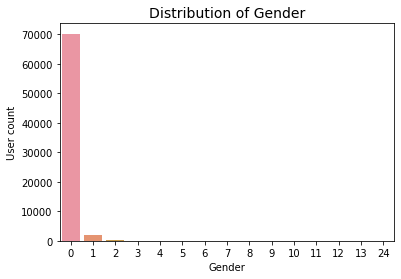

In [49]:
sns.countplot(info_userdata_df['has_class_cnt'])
plt.title('Distribution of Gender',fontsize=14)
plt.xlabel('Gender', fontsize=10)
plt.ylabel('User count', fontsize=10)

plt.show()

In [29]:
log_problem_df.shape

(4273203, 14)

In [33]:
# Let's pick a random exercise
log_problem_df_first_ucid = log_problem_df[log_problem_df['ucid'] == log_problem_df['ucid'][1]]

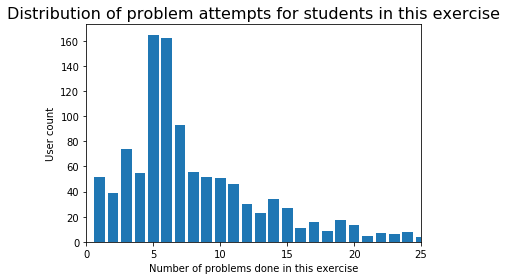

In [34]:
# Calculate number of problems done by each user
df_pcnt = log_problem_df_first_ucid.groupby('uuid').size().reset_index(name='problem_cnt')
df_pcnt = df_pcnt.sort_values(by=['problem_cnt'])
df_pcnt = df_pcnt.reset_index()

# Sort and plot
pcnt_distribution = df_pcnt['problem_cnt'].value_counts()
pcnt_distribution = pcnt_distribution.sort_index()

plt.bar(pcnt_distribution.index, pcnt_distribution.values)

plt.title('Distribution of problem attempts for students in this exercise', fontsize=16)
plt.xlabel("Number of problems done in this exercise", fontsize=10)
plt.ylabel("User count", fontsize=10)
plt.xlim((0, 25))

plt.show()

In [7]:
x = log_problem_df.groupby(['uuid','ucid'])['level'].max().reset_index()

In [8]:
x

,uuid,ucid,level
0,++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=,Qx6mwirYKln7CTvOXad5Do5OkVKmypYSQfFs0MB6Cvs=,1
1,++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=,eJs/Pql/Xui+9mjL0q4CwHI/r+w6Bn3tTCt0i6r4xrg=,0
2,++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=,hxF+GCZ2kFjuoHOUVj0a6Jn9NbRfydExscjLa0cvxuw=,0
3,++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=,m7rxdmifsJ8HxB91x1USFvW7op/ZusrvlAjq/FAmRE8=,0
4,++KRUQaY4gFsmV7egJVOWqbqbTth/oJBB7yX1HvCSL4=,BG1RsWojzEHzV28RBm/1iKi1NyZgDcDomLYEJSV6lmo=,1
...,...,...,...
489033,zzvvUOwcSXXTXd8xoyimNcm2DjeVPLmZAI19WKfhSAM=,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,1
489034,zzyukk9LNl7j/9xxgZj6roQBbGn1MjSPTCgc0r5sXpU=,4p305X/NqL1Zx9j6BDJEpiQx090kFF3o/LTTGJt5s/E=,1
489035,zzyukk9LNl7j/9xxgZj6roQBbGn1MjSPTCgc0r5sXpU=,9OXYxjWigzS5FgP5nZ1y1EAtwQihC19PGhDlRKqK3Pg=,1
489036,zzyukk9LNl7j/9xxgZj6roQBbGn1MjSPTCgc0r5sXpU=,EeAQRS+kGarrxqFWxO5U2lJ12zE7xgtIiHO9ojBNYpw=,1


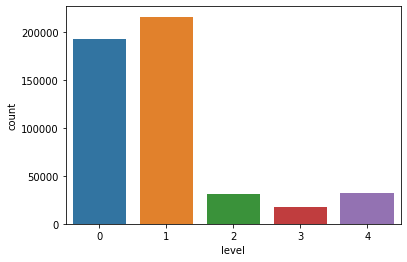

In [9]:
sns.countplot(x.level)

In [10]:
x['level'].describe()

count    489038.000000
mean          0.939406
std           1.091519
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: level, dtype: float64

In [11]:
log_problem_info_userdata_df = log_problem_df.merge(info_userdata_df,how='inner',on='uuid')

In [12]:
log_problem_info_userdata_info_content_df = log_problem_info_userdata_df.merge(info_content_df,how='left',on='ucid')

In [13]:
log_problem_info_userdata_info_content_df.head()

,upid,timestamp_TW,uuid,ucid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,...,has_class_cnt,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
0,ZmKEZ0F2WFqhlL7KFfJcHEnZCZu0e4p+CVG5rSlyKYk=,2018-09-28 20:00:00 UTC,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,Ps4dfShfpeMF3VG030HqZ2bsbD7PaVxvJYFTtroeSzQ=,2,1,True,11,1,0,...,1,【基礎】倍數的應用,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,ItasYR+er/FlZlRvL66/NB3wY0AvmlrZKoqe4gmPyD0=,VHYt8IeoqiIPVsB+32JAhIjK9jU+pnr11fL80QshARI=
1,Ilkv6d+nFM00DAFC0cnj++DQvBFu6eMcD7UCIGCNrws=,2018-09-28 20:15:00 UTC,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,Ps4dfShfpeMF3VG030HqZ2bsbD7PaVxvJYFTtroeSzQ=,19,2,True,19,1,0,...,1,【基礎】倍數的應用,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,ItasYR+er/FlZlRvL66/NB3wY0AvmlrZKoqe4gmPyD0=,VHYt8IeoqiIPVsB+32JAhIjK9jU+pnr11fL80QshARI=
2,STZD5cyjUf3J2AETFRoMb+LREPAPoAY3Cc8b63jV3Qw=,2018-10-24 10:15:00 UTC,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,RKkxBe+3Z33I75tZfZ8EY7LtVnN5QEfE8O0y6bPFCeo=,19,2,False,18,3,4,...,1,【進階】因數與公因數綜合習題,Exercise,hard,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,ItasYR+er/FlZlRvL66/NB3wY0AvmlrZKoqe4gmPyD0=,yFIhXSdRiIbnAJXjpjveYhhXopOOxVcUHbLdetuOIEc=
3,JrljyCVNZ6U5o5pyaJ/SZGoSW9QoWVGk2kOHeNFJk8A=,2018-10-31 19:15:00 UTC,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,MUbqU/Il0Jtq/WAby1VtcO+pS/tc7QnNE3TI/GuzuMM=,5,1,False,112,4,3,...,1,【一般】擴分、約分和通分綜合習題,Exercise,normal,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,zM75Dhur9om41RTSUIivWvZ07gckl2Hi0cd3/Kx4sN4=,mdOz1zUAYkWNIet2lO1ONCo2EB7BlHFb2c0H22ckBvM=
4,3etEMUOdg1aQ094NPnamWU0T0NbViDtKHt8ytLDsp2k=,2018-10-19 14:15:00 UTC,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,Qx6mwirYKln7CTvOXad5Do5OkVKmypYSQfFs0MB6Cvs=,3,1,False,123,11,3,...,1,【一般】三、四位數乘以三位數應用題,Exercise,normal,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,scsWmkZsfmdmD2IzB24sQ1Au1BOXYgQEx9zO3+4glq8=,orRpyO95F3mwPptd/5xtIk8d/dS50L0WucfG7OYzxYw=


In [14]:
log_problem_info_userdata_info_content_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4273203 entries, 0 to 4273202
Data columns (total 34 columns):
 #   Column                           Dtype 
---  ------                           ----- 
 0   upid                             object
 1   timestamp_TW                     object
 2   uuid                             object
 3   ucid                             object
 4   problem_number                   int64 
 5   exercise_problem_repeat_session  int64 
 6   is_correct                       bool  
 7   total_sec_taken                  int64 
 8   total_attempt_cnt                int64 
 9   used_hint_cnt                    int64 
 10  is_hint_used                     bool  
 11  is_downgrade                     object
 12  is_upgrade                       object
 13  level                            int64 
 14  gender                           object
 15  points                           int64 
 16  badges_cnt                       int64 
 17  first_login_date_TW        

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_size_inches'

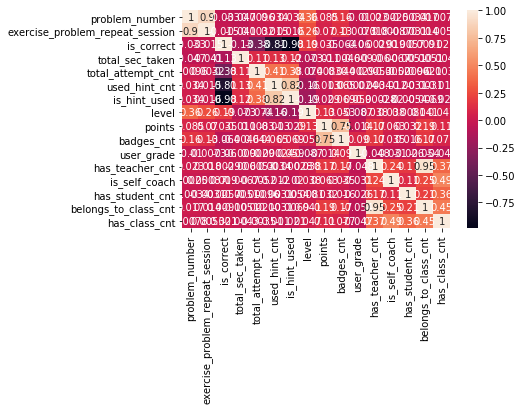

In [19]:
corrMatrix = log_problem_info_userdata_info_content_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.set_size_inches(18.5, 10.5)
plt.show()

In [22]:
corrMatrix

,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,level,points,badges_cnt,user_grade,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
problem_number,1.000000,0.895299,-0.032894,-0.046679,0.009642,0.033630,0.034128,0.358079,0.084913,0.158134,-0.010048,0.022597,0.002496,-0.003430,0.017214,0.007797
exercise_problem_repeat_session,0.895299,1.000000,-0.015468,-0.040522,0.003175,0.015304,0.016359,0.264742,0.069881,0.130828,-0.007301,0.017745,0.000866,-0.003089,0.014078,0.005279
is_correct,-0.032894,-0.015468,1.000000,-0.125505,-0.382046,-0.805741,-0.981417,0.194251,0.034711,-0.064033,-0.059593,0.002869,0.019388,0.005655,0.009070,0.020695
total_sec_taken,-0.046679,-0.040522,-0.125505,1.000000,0.106695,0.130348,0.123873,-0.072693,-0.010897,-0.004554,-0.008956,-0.006039,-0.006668,-0.005095,-0.005099,-0.004285
total_attempt_cnt,0.009642,0.003175,-0.382046,0.106695,1.000000,0.412544,0.376439,-0.074082,0.008324,0.043517,0.002873,0.005277,-0.005171,-0.000964,0.002149,-0.003522
used_hint_cnt,0.033630,0.015304,-0.805741,0.130348,0.412544,1.000000,0.820998,-0.161629,-0.012952,0.064722,0.000239,0.003425,-0.012173,-0.003068,-0.003138,-0.011032
is_hint_used,0.034128,0.016359,-0.981417,0.123873,0.376439,0.820998,1.000000,-0.191024,-0.029007,0.068954,0.058750,-0.000280,-0.019720,-0.005412,-0.006870,-0.020981
level,0.358079,0.264742,0.194251,-0.072693,-0.074082,-0.161629,-0.191024,1.000000,0.134799,0.052736,-0.086989,0.037945,0.038076,0.008055,0.041370,0.046656
points,0.084913,0.069881,0.034711,-0.010897,0.008324,-0.012952,-0.029007,0.134799,1.000000,0.754472,-0.014381,0.174025,0.062972,0.031519,0.188795,0.108679
badges_cnt,0.158134,0.130828,-0.064033,-0.004554,0.043517,0.064722,0.068954,0.052736,0.754472,1.000000,0.090009,0.169503,0.035098,0.016282,0.171581,0.076518


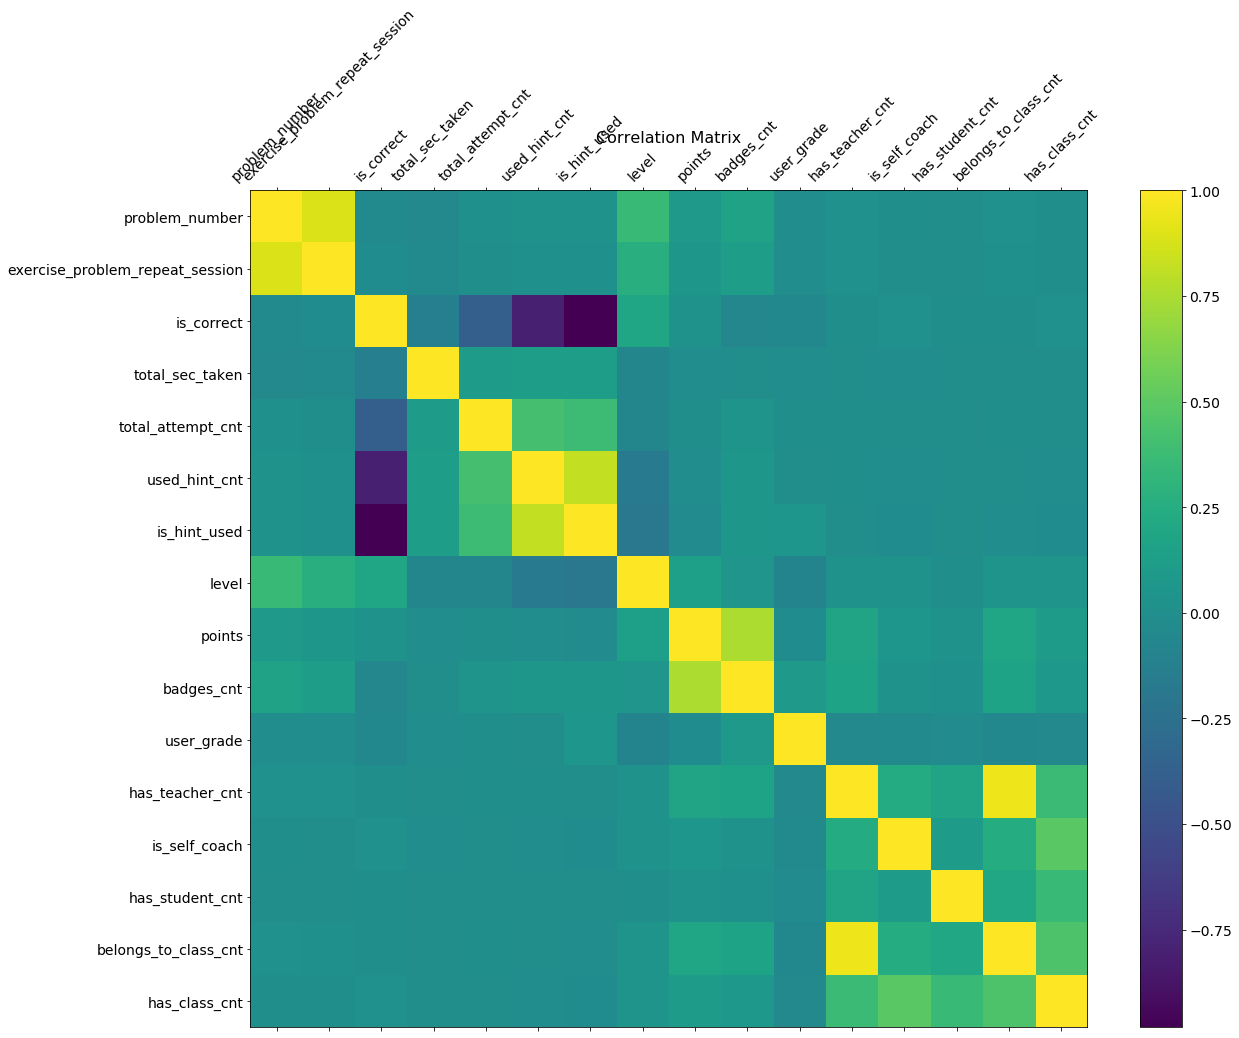

In [24]:
f = plt.figure(figsize=(19, 15))
plt.matshow(log_problem_info_userdata_info_content_df.corr(), fignum=f.number)
plt.xticks(range(corrMatrix.shape[1]), corrMatrix.columns, fontsize=14, rotation=45)
plt.yticks(range(corrMatrix.shape[1]), corrMatrix.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

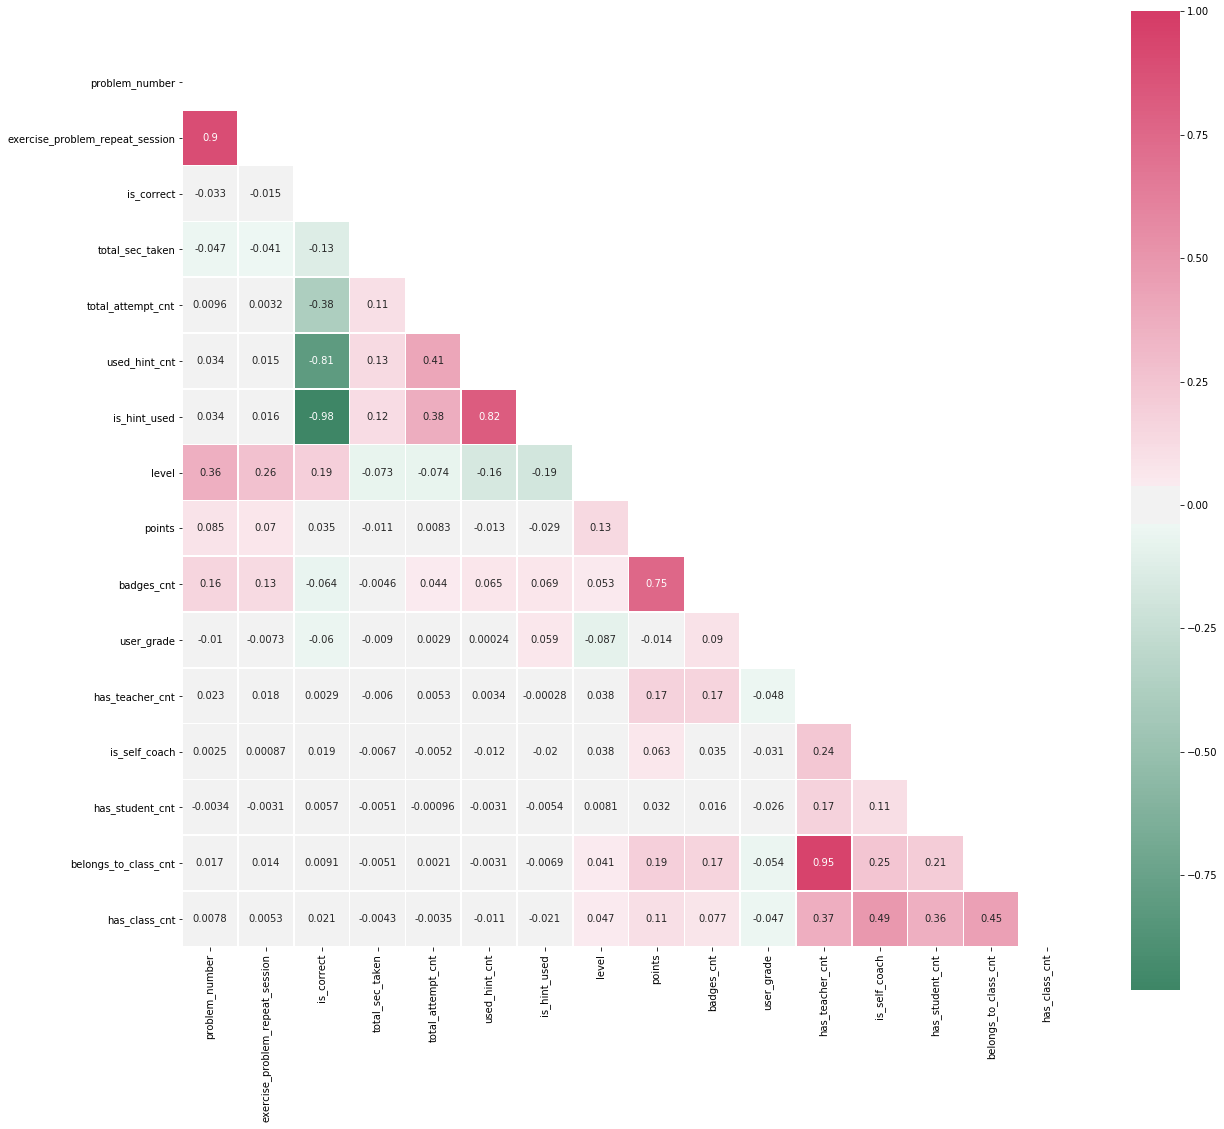

In [25]:
corr = log_problem_info_userdata_info_content_df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

In [4]:
merge_df=info_userdata_df.merge(log_problem_df, how='inner', on='uuid')

In [8]:
x=merge_df.groupby(by=['uuid','ucid']).agg({'level': 'max'}).reset_index()
x

,uuid,ucid,level
0,++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=,Qx6mwirYKln7CTvOXad5Do5OkVKmypYSQfFs0MB6Cvs=,1
1,++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=,eJs/Pql/Xui+9mjL0q4CwHI/r+w6Bn3tTCt0i6r4xrg=,0
2,++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=,hxF+GCZ2kFjuoHOUVj0a6Jn9NbRfydExscjLa0cvxuw=,0
3,++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=,m7rxdmifsJ8HxB91x1USFvW7op/ZusrvlAjq/FAmRE8=,0
4,++KRUQaY4gFsmV7egJVOWqbqbTth/oJBB7yX1HvCSL4=,BG1RsWojzEHzV28RBm/1iKi1NyZgDcDomLYEJSV6lmo=,1
...,...,...,...
489033,zzvvUOwcSXXTXd8xoyimNcm2DjeVPLmZAI19WKfhSAM=,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,1
489034,zzyukk9LNl7j/9xxgZj6roQBbGn1MjSPTCgc0r5sXpU=,4p305X/NqL1Zx9j6BDJEpiQx090kFF3o/LTTGJt5s/E=,1
489035,zzyukk9LNl7j/9xxgZj6roQBbGn1MjSPTCgc0r5sXpU=,9OXYxjWigzS5FgP5nZ1y1EAtwQihC19PGhDlRKqK3Pg=,1
489036,zzyukk9LNl7j/9xxgZj6roQBbGn1MjSPTCgc0r5sXpU=,EeAQRS+kGarrxqFWxO5U2lJ12zE7xgtIiHO9ojBNYpw=,1


In [48]:
y=x.groupby(by=['uuid']).agg({'level':'mean'})
y

,level
uuid,
++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=,1.000000
++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=,0.000000
++KRUQaY4gFsmV7egJVOWqbqbTth/oJBB7yX1HvCSL4=,2.000000
++LzeMQy/8bNUGD2K5Ms/GdiBlQ16ii82xNw3BYtOZE=,0.244898
++OS9yu6/ZTxCQatV9M1r+ISkFwl90yIczl2roOm12s=,0.000000
...,...
zz9dcPKZWbI6OJRi/C9wrfM4geS9M3Ba4pJtMmVg1aU=,0.914286
zztwLsjf44Uzumou84qh04wObpugkIllLCIp/mgoMu8=,0.800000
zzujjvdKzb4wL8cFKdF3Of5gg2XHzIDQCZ2TfaYpSNs=,0.000000


In [49]:
y.round()

,level
uuid,
++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=,1.0
++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=,0.0
++KRUQaY4gFsmV7egJVOWqbqbTth/oJBB7yX1HvCSL4=,2.0
++LzeMQy/8bNUGD2K5Ms/GdiBlQ16ii82xNw3BYtOZE=,0.0
++OS9yu6/ZTxCQatV9M1r+ISkFwl90yIczl2roOm12s=,0.0
...,...
zz9dcPKZWbI6OJRi/C9wrfM4geS9M3Ba4pJtMmVg1aU=,1.0
zztwLsjf44Uzumou84qh04wObpugkIllLCIp/mgoMu8=,1.0
zzujjvdKzb4wL8cFKdF3Of5gg2XHzIDQCZ2TfaYpSNs=,0.0


In [50]:
y['level'].round().value_counts().rename_axis('level').reset_index(name='counts')

,level,counts
0,1.0,17474
1,0.0,13891
2,2.0,2402
3,3.0,567
4,4.0,87


In [51]:
y['level'].round().value_counts().rename_axis('level').reset_index(name='counts').dtypes

level     float64
counts      int64
dtype: object

In [52]:
bins=[-1,2,5]
labels=['Not ready','Ready']

In [53]:
y['readiness'] = pd.cut(y['level'], bins,labels=labels)

In [54]:
y

,level,readiness
uuid,,
++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=,1.000000,Not ready
++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=,0.000000,Not ready
++KRUQaY4gFsmV7egJVOWqbqbTth/oJBB7yX1HvCSL4=,2.000000,Not ready
++LzeMQy/8bNUGD2K5Ms/GdiBlQ16ii82xNw3BYtOZE=,0.244898,Not ready
++OS9yu6/ZTxCQatV9M1r+ISkFwl90yIczl2roOm12s=,0.000000,Not ready
...,...,...
zz9dcPKZWbI6OJRi/C9wrfM4geS9M3Ba4pJtMmVg1aU=,0.914286,Not ready
zztwLsjf44Uzumou84qh04wObpugkIllLCIp/mgoMu8=,0.800000,Not ready
zzujjvdKzb4wL8cFKdF3Of5gg2XHzIDQCZ2TfaYpSNs=,0.000000,Not ready


In [69]:
merge_df=info_userdata_df.merge(log_problem_df, how='inner', on='uuid')
x=merge_df.groupby(by=['uuid','ucid']).agg({'level': 'max'}).reset_index()
y=x.groupby(by=['uuid']).agg({'level':'mean'}).round()

In [72]:
y

,level,readiness
uuid,,
++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=,1.0,Not ready
++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=,0.0,Not ready
++KRUQaY4gFsmV7egJVOWqbqbTth/oJBB7yX1HvCSL4=,2.0,Not ready
++LzeMQy/8bNUGD2K5Ms/GdiBlQ16ii82xNw3BYtOZE=,0.0,Not ready
++OS9yu6/ZTxCQatV9M1r+ISkFwl90yIczl2roOm12s=,0.0,Not ready
...,...,...
zz9dcPKZWbI6OJRi/C9wrfM4geS9M3Ba4pJtMmVg1aU=,1.0,Not ready
zztwLsjf44Uzumou84qh04wObpugkIllLCIp/mgoMu8=,1.0,Not ready
zzujjvdKzb4wL8cFKdF3Of5gg2XHzIDQCZ2TfaYpSNs=,0.0,Not ready


In [71]:
bins=[-1,2,5]
labels=['Not ready','Ready']
y['readiness'] = pd.cut(y['level'], bins,labels=labels)

In [73]:
y['readiness'].value_counts().rename_axis('readiness').reset_index(name='count')

,readiness,count
0,Not ready,33767
1,Ready,654


In [74]:
y.dtypes

level         float64
readiness    category
dtype: object

In [12]:
y.describe()

,level
count,34421.000000
mean,0.720476
std,0.618191
min,0.000000
25%,0.200000
50%,0.720000
75%,1.000000
max,4.000000


In [31]:
y.index

Index(['++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=',
       '++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=',
       '++KRUQaY4gFsmV7egJVOWqbqbTth/oJBB7yX1HvCSL4=',
       '++LzeMQy/8bNUGD2K5Ms/GdiBlQ16ii82xNw3BYtOZE=',
       '++OS9yu6/ZTxCQatV9M1r+ISkFwl90yIczl2roOm12s=',
       '++XViHodV4t1ncBoM6G2IV6BNjRXI/mohhzV17zFLXk=',
       '++fpgrYnaCGVbjwn/2PNaXyn3gqkhG/9pf+6QBQA48o=',
       '++uPJb+Y176V4a6NjR+KqE9V3ebZKH26n1NOL3eF5JI=',
       '++upcnhXy/npc/wOBxZ9Q9HrLXeUY2AKtwB6Q7s61nw=',
       '+/8WCgMd9X+4F+w/omHwA/I1ZDBslQXdUUW2yVnss1g=',
       ...
       'zz0zVBT0VL9TRoubLk7l6CoTQazdqIEWO+8QMdVEfg4=',
       'zz3KX6KRDsUJU/rzYYd08tA3RNBku/g6wby9RfLSrp4=',
       'zz4zTqoMDyuNAPlgw57/0W1l8MBnP1JK74avxtzR3BA=',
       'zz62JIoFHBjWeU+bFzr1hhj799cNGfZl+Rg7PzHYSPE=',
       'zz7PLv34fzM1qma3lx0V6NJteM81Hpe+uVAJsnp+nE4=',
       'zz9dcPKZWbI6OJRi/C9wrfM4geS9M3Ba4pJtMmVg1aU=',
       'zztwLsjf44Uzumou84qh04wObpugkIllLCIp/mgoMu8=',
       'zzujjvdKzb4wL8cFKdF3Of5gg2XHzIDQCZ2TfaYpSNs=',

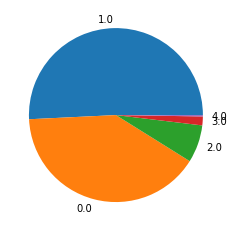

In [34]:
plt.pie(y['level'].round().value_counts(),labels=y['level'].round().value_counts().index) 
plt.show()

In [75]:
info_userdata_df.head()

,uuid,gender,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
0,Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=,NaN,18300,1,2019-01-24,1,kh,0,False,0,0,0
1,lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=,NaN,6468,0,2019-01-24,1,ntpc,1,False,0,1,0
2,ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=,male,4703,0,2019-01-24,1,tp,0,False,0,0,0
3,J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=,NaN,15525,1,2019-01-24,2,ntpc,0,False,0,0,0
4,qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=,NaN,7945,0,2019-01-24,2,km,1,False,0,1,0
